In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("temp.csv")

df.isna()

,t,x,y,z,vx,vy,vz,u
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
639995,False,False,False,False,False,False,False,False
639996,False,False,False,False,False,False,False,False
639997,False,False,False,False,False,False,False,False
639998,False,False,False,False,False,False,False,False


In [39]:
df['r'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df['v'] = np.sqrt(df['vx']**2 + df['vy']**2 + df['vz']**2)
df['r2'] = df['x']**2 + df['y']**2 + df['z']**2
df['v2'] = df['vx']**2 + df['vy']**2 + df['vz']**2

df.head()

,t,x,y,z,vx,vy,vz,u,r,v,r2,v2
0,0.0,2.0,2.0,2.0,2.265620,0.121709,1.244890,0,3.464102,2.587972,12.0,6.697598
1,0.0,4.0,2.0,2.0,-0.147643,1.622880,-0.436779,0,4.898979,1.687102,24.0,2.846314
2,0.0,6.0,2.0,2.0,-0.217880,0.623037,-1.389690,0,6.633250,1.538468,44.0,2.366885
3,0.0,8.0,2.0,2.0,1.335720,2.960800,2.047570,0,8.485281,3.839665,72.0,14.743027
4,0.0,2.0,4.0,2.0,0.111332,0.489449,2.025530,0,4.898979,2.086798,24.0,4.354727


In [40]:
df_bytimestep = df.groupby('t')[['v2']].mean()
df_bytimestep['T'] = df_bytimestep['v2'] / (3)
df_bytimestep.head()


,v2,T
t,,
0.000,6.288706,2.096235
0.001,6.275894,2.091965
0.002,6.262415,2.087472
0.003,6.248272,2.082757
0.004,6.233477,2.077826


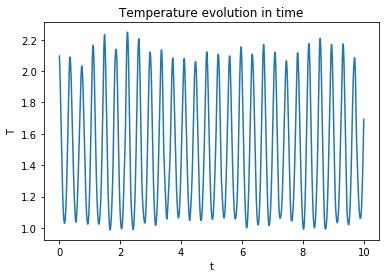

In [41]:
%matplotlib inline

df_bytimestep['T'].plot()
plt.title("Temperature evolution in time")
plt.ylim(0,2.5)
plt.ylabel("T");

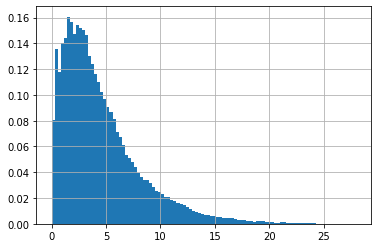

In [42]:
df['v2'].iloc[64000:].hist(bins=100, normed = True)

In [43]:
d = pd.read_csv("dist.csv", names=['t','L'])
d1 = pd.read_csv("dist1.csv", names=['t','L'])
print(d['L'].mean(), d1['L'].mean())

TypeError: can only concatenate str (not "int") to str

In [44]:
_ = plt.plot(d['t'], d['L'])
_ = plt.plot(d1['t'], d1['L'])


plt.show()

TypeError: -1.6274600000000001 is not a string